# Fethch the Data From Telangana Government Website using API

# Hotel Tariff Data
Hotel tariff refers to the price a hotel charges for its rooms. It can vary based on factors like room type, location, and time of year. This cost covers your stay and access to amenities

### Import all necesssary Libraries

In [208]:
import requests
import pandas as pd
from pandas import DataFrame as df
import urllib3
import os
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px
from sklearn.cluster import DBSCAN
from collections import Counter


#### Code for Fetching the Data From Website Using API

In [209]:
# Ignore the SSL warning using URL3 
urllib3.disable_warnings()
# Disable SSL certificate verification (not recommended for production use)

# Get the API URL
url = "https://data.telangana.gov.in/api/1/datastore/query/91258cd8-1f59-5322-916c-7ea80378ec5e?count=true&results=true&schema=true&keys=true&format=json"
response = requests.get(url, verify=False)
print(response)         # Response 200 means that the request was successful.

if response.status_code == 200:
    data = response.json()
    print(data)  # Print the entire JSON response

    # Print the keys present in the JSON data
    if data:
        keys = data.keys()
        print("Keys in the JSON data:", keys)

        # Accessing the appropriate key containing the data
        results = data.get('results', [])  

        if results:
            # Convert JSON data to a pandas DataFrame
            df = pd.DataFrame(results)
            print(df)
            # Export the DataFrame to a CSV file
            csv_filename = 'Telangana_Hotels_Tariff.csv'
            #df.to_csv(csv_filename, index=False)

            print(f"Success!! Data has been exported to {csv_filename}")
        else:
            print("UUps! No data found in the specified key.")
    else:
        print("No JSON data found.")
else:
    print(" Uhh! Failed to retrieve data. Status code:", response.status_code)


<Response [200]>
{'results': [{'hotel': 'ALAMPUR', 'city': 'ALAMPUR', 'address': 'Haritha Hotel Alampur,  Alampur, Jogulamba Gadwal District, Telangana', 'contact': '9705392100', 'room_type': 'A/C ROOM', 'total_rooms': '15', 'sunday_tariff': '1500', 'monday_tariff': '1500', 'tuesday_tariff': '1500', 'wednesday_tariff': '1500', 'thursday_tariff': '1500', 'friday_tariff': '1500', 'saturday_tariff': '1500'}, {'hotel': 'ALAMPUR', 'city': 'ALAMPUR', 'address': 'Haritha Hotel Alampur,  Alampur, Jogulamba Gadwal District, Telangana', 'contact': '9705392100', 'room_type': 'A/C SUITE', 'total_rooms': '1', 'sunday_tariff': '3000', 'monday_tariff': '3000', 'tuesday_tariff': '3000', 'wednesday_tariff': '3000', 'thursday_tariff': '3000', 'friday_tariff': '3000', 'saturday_tariff': '3000'}, {'hotel': 'ALISAGAR', 'city': 'ALISAGAR', 'address': 'Haritha Hotel Alisagar, Alisagar, Nizambad District, Telangana', 'contact': '7997253366', 'room_type': 'A/C ROOM', 'total_rooms': '4', 'sunday_tariff': '1500'

# Hotels Latitude and Longitude

In [210]:
# Ignore the SSL warning using URL3 
urllib3.disable_warnings()
# Disable SSL certificate verification (not recommended for production use)

# Get the API URL
url = "https://data.telangana.gov.in/api/1/datastore/query/35cb7b6a-fb69-5c41-8e24-efb79d342c3b?count=true&results=true&schema=true&keys=true&format=json"
response = requests.get(url, verify=False)
print(response)    # Response 200 means that the request was successful.

if response.status_code == 200:
    data = response.json()
    print(data)  # Print the entire JSON response

    # Print the keys present in the JSON data
    if data:
        keys = data.keys()
        print("Keys in the JSON data:", keys)

        # Accessing the appropriate key containing the data
        results = data.get('results', [])  

        if results:
            # Convert JSON data to a pandas DataFrame
            df = pd.DataFrame(results)
            print(df)
            # Export the DataFrame to a CSV file
            csv_filename = 'Telangana_Hotel_Location.csv'
            #df.to_csv(csv_filename, index=False)

            print(f"Success!! Data has been exported to {csv_filename}")
        else:
            print("UUps! No data found in the specified key.")
    else:
        print("No JSON data found.")
else:
    print(" Uhh! Failed to retrieve data. Status code:", response.status_code)

<Response [200]>
{'results': [{'hotel': 'ALAMPUR', 'city': 'ALAMPUR', 'address': 'Haritha Hotel Alampur,  Alampur, Jogulamba Gadwal District, Telangana', 'contact': '9705392100', 'lat': '15.8798959', 'long': '78.126955'}, {'hotel': 'ALISAGAR', 'city': 'ALISAGAR', 'address': 'Haritha Hotel Alisagar, Alisagar, Nizambad District, Telangana', 'contact': '7997253366', 'lat': '18.6760051', 'long': '78.0111574'}, {'hotel': 'ANANTHAGIRI VIKARABAD', 'city': 'ANANTHAGIRI VIKARABAD', 'address': 'Haritha Hotel Ananthagiri, Ananthagiri Hills, Vikarabad, Telangana', 'contact': '9010911122', 'lat': '17.3117741', 'long': '77.875494'}, {'hotel': 'BASARA,HARITHA HOTEL', 'city': 'BASARA', 'address': 'Haritha Hotel Basar, Basar, Nirmal District, Telangana', 'contact': '9848074462', 'lat': '18.8795107', 'long': '77.9562862'}, {'hotel': 'BHADRACHALAM,HARITHA HOTEL', 'city': 'BHADRACHALAM', 'address': 'Haritha Hotel Bhadrachalam, Bhadrachalam, Bhadradri Kothagudem District, Telangana', 'contact': '9848823073

# Domestic Visitors

In [211]:
# Ignore the SSL warning using urllib3
urllib3.disable_warnings()
# # Disable SSL certificate verification (not recommended for production use)

# Years range for which we want to fetch data
years = range(2014, 2021)  # 2014 to 2020

# Define the base API URL without the year-specific part
base_api_url = "https://data.telangana.gov.in/api/1/datastore/query/"

# Define the API endpoint for each year
api_endpoints = {
    2014: "b024b7da-7ef4-5f01-adf5-9f6b6ba11bfd",
    2015: "43f0d658-9180-5c6b-a27e-7d104d908b43",
    2016: "4c7dbaf6-9b83-5798-9e40-f2a26bd81ed9",
    2017: "dc9da873-bce0-5f61-a078-5e867791e788",
    2018: "280456f0-73b7-55f4-be84-c8bc30f20bc1",
    2019: "496db458-f2f3-5937-88fd-2b5cbddbc43c",
    2020: "3d819be9-a055-5fba-8c13-c17779e59133"
}

# Folder where we want to save the CSV files
output_folder = "Domestic_Visitors"

# Create the folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Iterate through each year and fetch data
for year in years:
    endpoint = api_endpoints.get(year)
    url = f"{base_api_url}{endpoint}?count=true&results=true&schema=true&keys=true&format=json"

    try:
        # Send a GET request to the API
        response = requests.get(url, verify=False)

        # Check if the response status code is 200 (OK)
        if response.status_code == 200:
            data = response.json()

            # Get the 'results' key from the data
            results = data.get('results', [])

            # Check if data exists for the year
            if results:
                # Convert data to a DataFrame
                df = pd.DataFrame(results)

                # Define the CSV filename using the year
                csv_filename = os.path.join(output_folder, f'Telangana_Domestic_Visitors_{year}.csv')

                # Export DataFrame to a CSV file
                #df.to_csv(csv_filename, index=False)

                print(f"Data for {year} has been exported to {csv_filename}")
            else:
                print(f"No data found for {year}.")
        else:
            print(f"Failed to retrieve data for {year}. Status Code: {response.status_code}")
    except Exception as e:
        print(f"Uhh! An error occurred while fetching data for {year}: {e}")



Data for 2014 has been exported to Domestic_Visitors\Telangana_Domestic_Visitors_2014.csv
Data for 2015 has been exported to Domestic_Visitors\Telangana_Domestic_Visitors_2015.csv
Data for 2016 has been exported to Domestic_Visitors\Telangana_Domestic_Visitors_2016.csv
Data for 2017 has been exported to Domestic_Visitors\Telangana_Domestic_Visitors_2017.csv
Data for 2018 has been exported to Domestic_Visitors\Telangana_Domestic_Visitors_2018.csv
Data for 2019 has been exported to Domestic_Visitors\Telangana_Domestic_Visitors_2019.csv
Data for 2020 has been exported to Domestic_Visitors\Telangana_Domestic_Visitors_2020.csv


# Foreign Visitors

In [212]:

# Ignore the SSL warning using urllib3
urllib3.disable_warnings()
# # Disable SSL certificate verification (not recommended for production use)

# Years range for which we want to fetch data
years = range(2014, 2021)  # 2014 to 2020

# Define the base API URL without the year-specific part
base_api_url = "https://data.telangana.gov.in/api/1/datastore/query/"

# Define the API endpoint for each year
api_endpoints = {
    2014: "0ad02868-a90d-5a67-9665-87957d17e31b",
    2015: "016b14b6-b8b7-574e-8a1b-8ac1117406d9",
    2016: "656e948e-2714-5e0c-8951-c0a96b494905",
    2017: "a3d95bfa-cf37-5418-9609-a1c812e4b995",
    2018: "37eea480-c7fa-5eed-a574-d2d25bb68d1e",
    2019: "edf764f7-ad23-5442-8001-9d12f1692b0a",
    2020: "bb154544-cc8d-5783-b768-3524454e2fde"
}

# Folder where we want to save the CSV files
output_folder = "Foreign_Visitors"

# Create the folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Iterate through each year and fetch data
for year in years:
    endpoint = api_endpoints.get(year)
    url = f"{base_api_url}{endpoint}?count=true&results=true&schema=true&keys=true&format=json"

    try:
        # Send a GET request to the API
        response = requests.get(url, verify=False)

        # Check if the response status code is 200 (OK)
        if response.status_code == 200:
            data = response.json()
            print(data)
            # Get the 'results' key from the data
            results = data.get('results', [])

            # Check if data exists for the year
            if results:
                # Convert data to a DataFrame
                df = pd.DataFrame(results)

                # Define the CSV filename using the year
                csv_filename = os.path.join(output_folder, f'Telangana_Foreign_Visitors_{year}.csv')

                # Export DataFrame to a CSV file
                #df.to_csv(csv_filename, index=False)

                print(f"Data for {year} has been exported to {csv_filename}")
            else:
                print(f"No data found for {year}.")
        else:
            print(f"Failed to retrieve data for {year}. Status Code: {response.status_code}")
    except Exception as e:
        print(f" Uhh! An error occurred while fetching data for {year}: {e}")


{'results': [{'district': 'Adilabad', 'month': 'January', 'visitors': '5'}, {'district': 'Adilabad', 'month': 'February', 'visitors': '6'}, {'district': 'Adilabad', 'month': 'March', 'visitors': '5'}, {'district': 'Adilabad', 'month': 'April', 'visitors': '6'}, {'district': 'Adilabad', 'month': 'May', 'visitors': '6'}, {'district': 'Adilabad', 'month': 'June', 'visitors': '7'}, {'district': 'Adilabad', 'month': 'July', 'visitors': '7'}, {'district': 'Adilabad', 'month': 'August', 'visitors': '5'}, {'district': 'Adilabad', 'month': 'September', 'visitors': '8'}, {'district': 'Adilabad', 'month': 'October', 'visitors': '8'}, {'district': 'Adilabad', 'month': 'November', 'visitors': '8'}, {'district': 'Adilabad', 'month': 'December', 'visitors': '9'}, {'district': 'Hyd & R R Dist.', 'month': 'January', 'visitors': '7587'}, {'district': 'Hyd & R R Dist.', 'month': 'February', 'visitors': '7871'}, {'district': 'Hyd & R R Dist.', 'month': 'March', 'visitors': '7683'}, {'district': 'Hyd & R R

## Let's Do Some Analysis

###  Average Tariff Analysis by Room Type

In [213]:
try: 
    # Load the CSV data into a DataFrame
        data = pd.read_csv("Telangana_Hotels_Tariff.csv")

        # Display the first few rows of the DataFrame to verify the column names
        #print(data.head())

        # Check if the "room_type" column exists in the DataFrame
        if "room_type" in data.columns:
            # Calculate the average tariff for each room type
            columns_to_average = ["sunday_tariff", "monday_tariff", "tuesday_tariff",
                                "wednesday_tariff", "thursday_tariff", "friday_tariff", "saturday_tariff"]
            
            average_tariff_by_type = data.groupby("room_type")[columns_to_average].mean()
            
            #print(average_tariff_by_type)
        else:
            print("Column 'room_type' not found in the dataset.")

        # Convert the data to a data frame
        df = pd.DataFrame(average_tariff_by_type)
        print(df)

        # Export the data to a CSV file
        #df.to_csv("Average_Tariff_By_Type.csv")
except Exception as e:
        print("Uhh! An Error Occurred:", e)

                                      sunday_tariff  monday_tariff  \
room_type                                                            
A/C 4 BEDDED ROOM                       1450.000000    1450.000000   
A/C DELUXE                              2245.000000    1870.000000   
A/C DELUXE (NEW)                        1800.000000    1500.000000   
A/C DORMITORY 5 BEDDED                  1680.000000    1680.000000   
A/C Glass Room (Island)                 3000.000000    3000.000000   
A/C Lake View                           2000.000000    2000.000000   
A/C ROOM                                1449.000000    1395.388889   
A/C ROOM (OLD)                          1200.000000    1100.000000   
A/C STANDARD                            2139.500000    1789.500000   
A/C SUITE                               2764.444444    2506.666667   
CONFERENCE HALL                         1000.000000    1000.000000   
DORMITORY TWO BEDDED (OLD)               500.000000     500.000000   
GLASS COTTAGES      

#### We can gain some Insights from the above 

On Fridays and Saturdays, the rates for "A/C DELUXE" and "A/C SUITE" are higher. This could mean that these premium room categories are in high demand on weekends.<br />
Room categories such as "A/C DORMITORY 5 BEDDED" and "NON A/C DORMITORY 4 BEDDED," among others, have the same daily rate, implying that they are targeted towards group stays.

#### Let's Create Average Tariff Price csv file for analysis

In [214]:
try: 
    # Load the dataset
    data = pd.read_csv("Telangana_Hotels_Tariff.csv")

    # Calculate the average tariff for each room type
    columns_to_average = ["sunday_tariff", "monday_tariff", "tuesday_tariff",
                        "wednesday_tariff", "thursday_tariff", "friday_tariff", "saturday_tariff"]
    average_tariff_by_type = data.groupby("room_type")[columns_to_average].mean()

    # Calculate the overall average tariff for each room type
    average_tariff_by_type["Average_Tariff"] = average_tariff_by_type.mean(axis=1)

    # Sort room types by average tariff in descending order
    average_tariff = average_tariff_by_type.sort_values(by="Average_Tariff", ascending=False)

    ## Display the inferred preferences based on higher average tariffs
    #print("Inferred Room Type Preferences based on Average Tariffs:")
    #print(sorted_room_preferences[["Average_Tariff"]])

    # Convert the data to a data frame
    df = pd.DataFrame(average_tariff)
    #print(df)
    ## Export the data to a CSV file
    # df.to_csv("Average_Tariff.csv")
    
except Exception as e:
    print("Uhh! An Error Occurred:", e)

#### Create a bat chart for Average Tariff Price

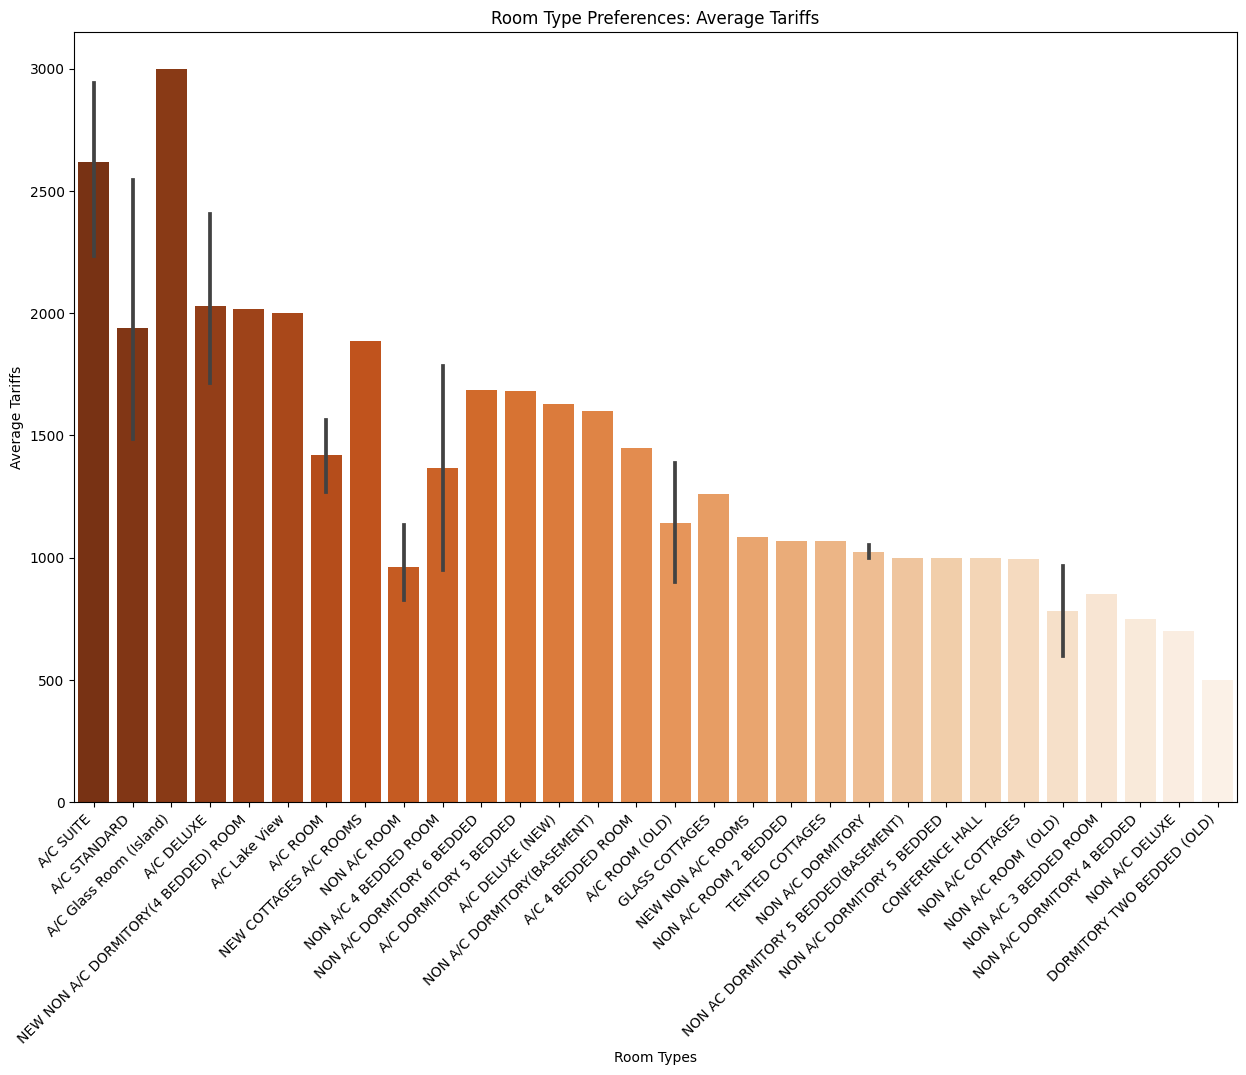

Top Room Types based on Average Tariffs:
                               room_type  Average_Tariff
4                              A/C SUITE         3357.14
73                          A/C STANDARD         3328.00
40               A/C Glass Room (Island)         3000.00
38                            A/C DELUXE         2800.00
66  NEW NON A/C DORMITORY(4 BEDDED) ROOM         2016.00


In [215]:
try:
    # Load data into a pandas DataFrame
    data = pd.read_csv("Telangana_Hotels_Tariff.csv")  

    # Select columns containing tariff values
    tariff_columns = ["sunday_tariff", "monday_tariff", "tuesday_tariff",
                    "wednesday_tariff", "thursday_tariff", "friday_tariff", "saturday_tariff"]

    # Calculate average tariffs for each room type
    data["Average_Tariff"] = data[tariff_columns].mean(axis=1)
    # Calculating the mean(axis=1) helps find the average tariff for each room type across the days of the week

    # Rank room types based on average tariffs
    room_type_ranking = data.sort_values(by="Average_Tariff", ascending=False)

    # Data Visualization using Seaborn
    plt.figure(figsize=(15, 10))     # ( Width, Height)
    sns.barplot(x="room_type", y="Average_Tariff", data=room_type_ranking, palette="Oranges_r")
    plt.title('Room Type Preferences: Average Tariffs')
    plt.xlabel('Room Types')
    plt.ylabel('Average Tariffs')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
    #  'ha' adjusts the horizontal alignment of the tick labels on the x-axis to the right side of the ticks

    #plt.tight_layout() 
    ## It ensure that they fit within the figure area nicely
    plt.show()

    # Display the top 5 room types with highest average tariffs rounded down to 2 places
    top_room_types = room_type_ranking.drop_duplicates(subset=["room_type"]).head(5)       # Remove duplicates from the top 5 room types
    print("Top Room Types based on Average Tariffs:")
    print(top_room_types[["room_type", "Average_Tariff"]].round(2))
except Exception as e:
    print("Uhh! An Error Occurred:", e)

#### Insights :
1. Room types A/C Suite has highest Tariff shows that customers might be interested in these types of rooms.
2. Room types such as "A/C Glass Room (Island)"  are likely to offer unique features such as beautiful scenery, resulting in increased demand and, as a result, higher tariffs.<br/>
3. One interesting discovery is that the NEW NON A/C DORMITORY(4 BEDDED) ROOM is in the top *FIVE* rooms. This implies that some customers may select less expensive options with shared accommodation, even if they are not air-conditioned.

#### Map Visual

In [216]:
# # With This code, We can create a map of Telangana hotels and save it with .html format.

# # Load the CSV file into a DataFrame
# data = pd.read_csv("Telangana_Hotel_Location.csv")

# # Create a map centered around the coordinates of Telangana
# m = folium.Map(location=[17.8749, 78.1006], zoom_start=7)

# # Iterate through the rows of the DataFrame and add markers for each hotel
# for index, row in data.iterrows():
#     hotel_name = row["hotel"]
#     city = row["city"]
#     address = row["address"]
#     lat = row["lat"]  
#     lon = row["long"] 

#     # Create a popup for the marker
#     popup = f"<b>{hotel_name}</b><br>{city}<br>{address}"

#     # Add the marker to the map
#     folium.Marker(
#         location=[lat, lon],
#         popup=popup,
#         icon=folium.Icon(icon="hotel")
#     ).add_to(m)

# # Save the map to an HTML file
# m.save("hotels_map.html")


In [217]:
# Map Visual using plotly express library 

# Load the CSV file into a DataFrame
data = pd.read_csv("Telangana_Hotel_Location.csv")

# Create a scattermapbox figure using Plotly Express
fig = px.scatter_mapbox(data,
                        lat="lat",  
                        lon="long",  
                        hover_name="hotel",
                        hover_data=["city", "address"],
                        zoom=7)

# Customizing the markers with icons
fig.update_traces(marker=dict(size=50, opacity=0.3, symbol="circle", color="orange"))

# Update the map layout
fig.update_layout(mapbox_style="open-street-map", # Type of Map layout
                mapbox_center={"lat": 17.8749, "lon": 78.1006},  # Centered around Telangana
                margin={"r":0,"t":0,"l":0,"b":0})

# Display the interactive map
fig.show()


The map shows that the **THE PLAZA** hotel is close to the *Begumpet Airport*, hence the tariff is greater than the other hotels.

### Let's Merge the data from the Location and Tariff files 

In [218]:
# Read the CSV files into DataFrames
hotels_tariff_df = pd.read_csv('Telangana_Hotels_Tariff.csv')
hotel_location_df = pd.read_csv('Telangana_Hotel_Location.csv')

# Merge the DataFrames based on the 'hotel' column
merged_df = pd.merge(hotels_tariff_df, hotel_location_df[['hotel', 'lat', 'long']], on='hotel', how='left')

# Save the merged DataFrame to a new CSV file
#merged_df.to_csv('Updated_Hotels_Tariff.csv', index=False)

#### Which city has the highest number of Hotels

In [219]:

hotel_location_df = pd.read_csv('Updated_Hotels_Tariff.csv')
lat_lon_data = hotel_location_df[['lat', 'long']]

# Use DBSCAN with a small epsilon and a minimum number of samples
dbscan = DBSCAN(eps=0.001, min_samples=100).fit(lat_lon_data)
labels = dbscan.labels_

# Count the occurrences of each label
label_counts = Counter(labels)

# Find the label with the highest count (excluding noise points)
most_common_label = max(label_counts, key=label_counts.get)

# Get the indices of data points in the most common cluster
cluster_indices = [index for index, label in enumerate(labels) if label == most_common_label]

# Get the cities corresponding to the indices
cities_in_cluster = hotel_location_df.loc[cluster_indices, 'city']

# Count the occurrences of each city in the cluster
city_counts = Counter(cities_in_cluster)

# Find the city with the highest count
city_with_highest_concentration = max(city_counts, key=city_counts.get)

print("City with the highest concentration of hotels:", city_with_highest_concentration)

City with the highest concentration of hotels: SOMASILA


**SOMASILA** has highest concentration of hotels, reveals its tourist potential that draw people. <br />
The concentration of hotels in Somasila benefits the local economy by creating jobs, increasing tourism money, and maybe expanding infrastructure.